In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import scipy

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 11)

In [5]:
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


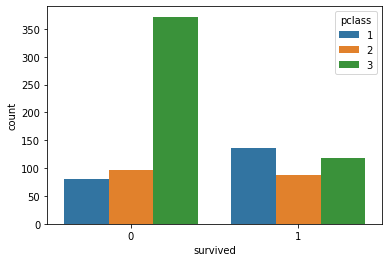

In [7]:
# gaining insights
sns.countplot(x=df['survived'], hue=df['pclass'])

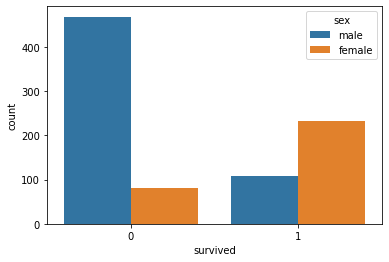

In [8]:
# gaining insights
sns.countplot(x=df['survived'], hue =df['sex'])

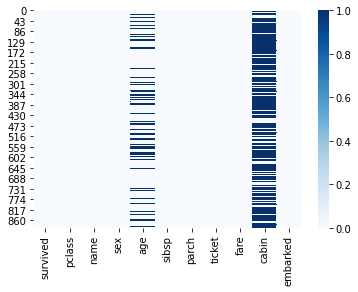

In [9]:
# checking null values
sns.heatmap(df.isnull(), cmap='Blues')

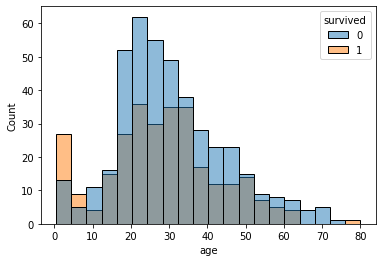

In [10]:
sns.histplot(x=df['age'], hue=df['survived'])

In [11]:
# filling null values
df['age'].fillna(value = np.median(df['age'].dropna()), inplace=True)

In [12]:
# dropping columns
df.drop(columns=['name','ticket','cabin'], inplace=True)

In [13]:
# encoding categorical feature
df = pd.concat([df,pd.get_dummies(df['embarked'])], axis=1)
df.drop(columns=['embarked'], inplace=True)

In [14]:
# encoding categorical feature
df = pd.concat([df,pd.get_dummies(df['pclass'])], axis=1)
df.drop(columns=['pclass'], inplace=True)

In [15]:
# encoding categorical feature
df = pd.concat([df,pd.get_dummies(df['sex'])], axis=1)
df.drop(columns=['sex'], inplace=True)

In [16]:
# scaling age
df['age']  = (df.age - np.median(df.age))/(scipy.stats.iqr(df.age))

In [17]:
# scaling fare
df['fare']  = (df.fare - np.median(df.fare))/(scipy.stats.iqr(df.fare))

In [18]:
df.head()

,survived,age,sibsp,parch,fare,C,Q,S,1,2,3,female,male
0,0,-0.461538,1,0,-0.312011,0,0,1,0,0,1,0,1
1,1,0.769231,1,0,2.461242,1,0,0,1,0,0,1,0
2,1,-0.153846,0,0,-0.282777,0,0,1,0,0,1,1,0
3,1,0.538462,1,0,1.673732,0,0,1,1,0,0,1,0
4,0,0.538462,0,0,-0.277363,0,0,1,0,0,1,0,1


In [19]:
x = df.drop(columns=['survived'])
y = df.survived

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.9, random_state=0)

In [21]:
x_train.shape

(801, 12)

In [26]:
# building model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(10, input_dim=12, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(4, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train, epochs=100, batch_size=9)

Epoch 1/100
89/89 [==============================] - 1s 792us/step - loss: 0.6765 - accuracy: 0.5924
Epoch 2/100
89/89 [==============================] - 0s 886us/step - loss: 0.6470 - accuracy: 0.6418
Epoch 3/100
89/89 [==============================] - 0s 859us/step - loss: 0.6254 - accuracy: 0.6224
Epoch 4/100
89/89 [==============================] - 0s 827us/step - loss: 0.5791 - accuracy: 0.6982
Epoch 5/100
89/89 [==============================] - 0s 812us/step - loss: 0.5204 - accuracy: 0.8068
Epoch 6/100
89/89 [==============================] - 0s 912us/step - loss: 0.5217 - accuracy: 0.7916
Epoch 7/100
89/89 [==============================] - 0s 935us/step - loss: 0.5149 - accuracy: 0.7797
Epoch 8/100
89/89 [==============================] - 0s 874us/step - loss: 0.4752 - accuracy: 0.8307
Epoch 9/100
89/89 [==============================] - 0s 961us/step - loss: 0.4574 - accuracy: 0.8386
Epoch 10/100
89/89 [==============================] - 0s 890us/step - loss: 0.4639 - accura

In [29]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8222


[0.39380958676338196, 0.8222222328186035]

## Accuracy: 82.22%